# compare output from different versions of ANGSD/realSFS

I have estimated two 2D unfolded SFS's with the same command lines from the same data. The _old_ spectrum was estimated with a version of ANGSD/realSFS predating 20 June 2017 (0.915-5-ge6e63e5, Nov 2016). The _new_ spectrum was estimated with a version of ANGSD/realSFS from the 20 June 2017 (0.917-142-ge3dbeaa). The calculation of the SAF files for the new spectrum was also parallised with GNU parallel over split regions files, since `realSFS cat` worked fine with the new version of ANGSD/realSFS (see ANGSD issue [#60](https://github.com/ANGSD/angsd/issues/60))

In [1]:
import sys

sys.path.insert(0, "/home/claudius/Downloads/dadi")

import dadi

error in importing Two Locus modules


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
% ll FST/*2dsfs

-rw-rw-r-- 1 claudius  3547 Dec 18  2016 FST/EryPar.FOLDED.2dsfs
-rw-rw-r-- 1 claudius 12755 Dec 17  2016 FST/EryPar.unfolded.2dsfs
-rw-rw-r-- 1 claudius 12724 Aug 13 00:41 FST/EryPar.unfolded.exhaustive.2dsfs


In [4]:
# import 2D unfolded spectrum estimated with older version of angsd/realSFS (2016)

sfs2d_old_unfolded = dadi.Spectrum.from_file('FST/EryPar.unfolded.2dsfs.dadi')

# add population labels
sfs2d_old_unfolded.pop_ids = ["ery", "par"]

In [5]:
# import 2D unfolded spectrum estimated with new version of angsd/realSFS (20 June 2017)

sfs2d_new_unfolded = dadi.Spectrum.from_file('SFS/with_ANGSD-0.917-142-ge3dbeaa/EryPar/EryPar.unfolded.2dsfs.dadi')

# add population labels
sfs2d_new_unfolded.pop_ids = ["ery", "par"]

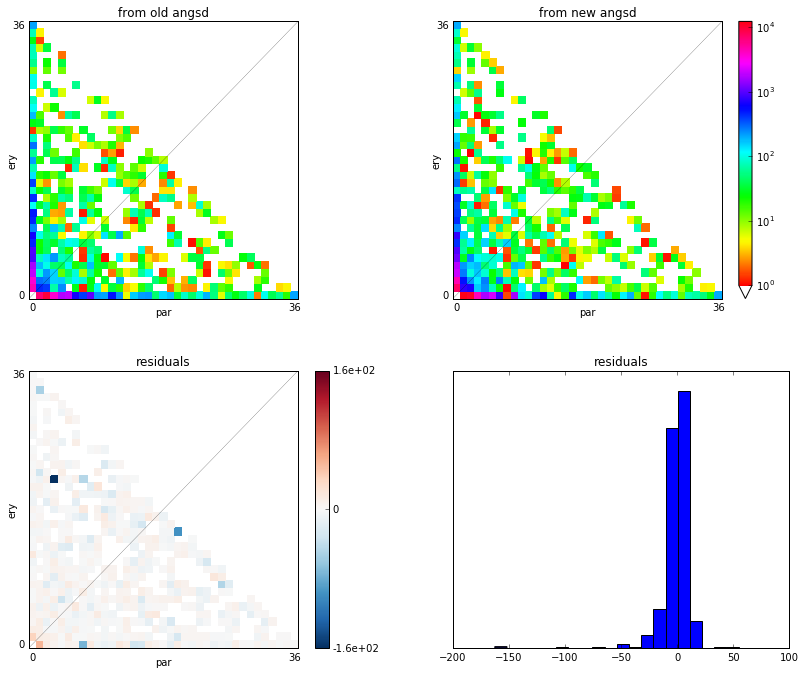

In [6]:
plt.figure(figsize=(12, 10))
dadi.Plotting.plot_2d_comp_Poisson(data=sfs2d_old_unfolded.fold(), model=sfs2d_new_unfolded.fold(), \
                                   vmin=1, title=['from old angsd', 'from new angsd'])

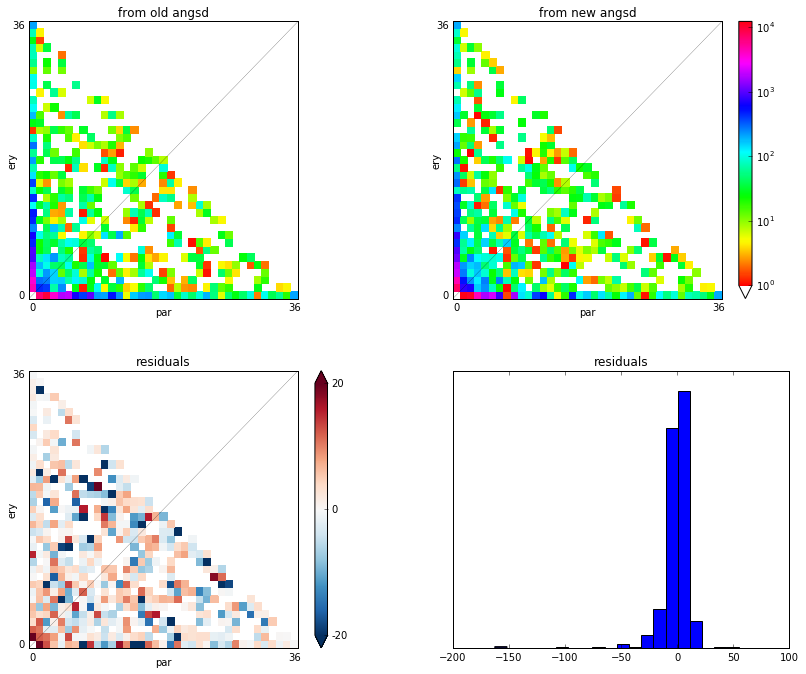

In [7]:
plt.figure(figsize=(12, 10))
dadi.Plotting.plot_2d_comp_Poisson(data=sfs2d_old_unfolded.fold(), model=sfs2d_new_unfolded.fold(), \
                                   vmin=1, title=['from old angsd', 'from new angsd'], \
                                  resid_range=20)

In [12]:
dadi.Plotting.plot_2d_comp_Poisson?

In [8]:
# get marginal 1D spectra

fs_ery_m_old = sfs2d_old_unfolded.marginalize([1]).fold()
fs_par_m_old = sfs2d_old_unfolded.marginalize([0]).fold()

fs_ery_m_new = sfs2d_new_unfolded.marginalize([1]).fold()
fs_par_m_new = sfs2d_new_unfolded.marginalize([0]).fold()

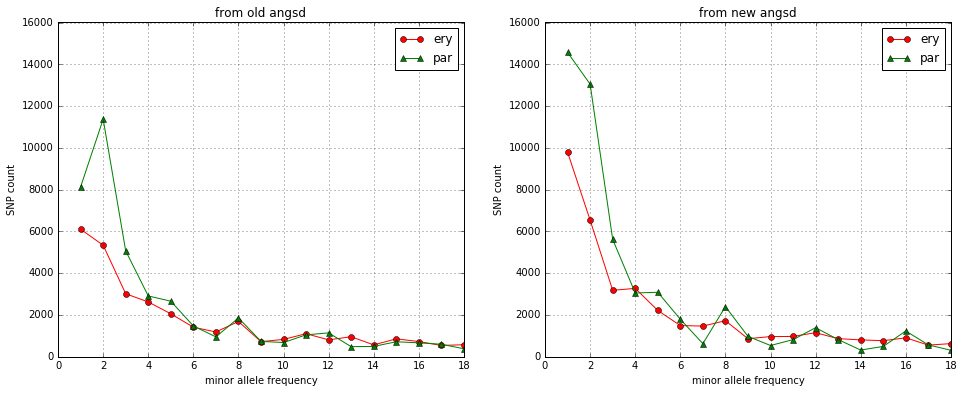

In [9]:
plt.figure(figsize=(16,6))

m = (max(fs_ery_m_old.data[1:]), max(fs_par_m_old.data[1:]), max(fs_ery_m_new.data[1:]), max(fs_par_m_new.data[1:]))

plt.subplot(121)
plt.plot(fs_ery_m_old, 'ro-', label='ery')
plt.plot(fs_par_m_old, 'g^-', label='par')
plt.ylim(0, max(m)*1.1)
plt.grid()
plt.legend()
plt.title('from old angsd')
plt.xlabel('minor allele frequency')
plt.ylabel('SNP count')

plt.subplot(122)
plt.plot(fs_ery_m_new, 'ro-', label='ery')
plt.plot(fs_par_m_new, 'g^-', label='par')
plt.ylim(0, max(m)*1.1)
plt.grid()
plt.legend()
plt.title('from new angsd')
plt.xlabel('minor allele frequency')
plt.ylabel('SNP count')

The two ANGSD/realSFS versions come up with **very** different results!

In [12]:
# get total number of sites in 2DSFS from old and new version of angsd

print sfs2d_old_unfolded.data.sum()

print sfs2d_new_unfolded.data.sum()

print sfs2d_old_unfolded.data.sum() - sfs2d_new_unfolded.data.sum()

1130775.0
1133523.00001
-2748.000006
